In [1]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    return np.array(y_noise)


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise = normal(y, mu, var)
    return x, y, y_noise

In [3]:
nodes = 50
mu = 0
var = 0.01


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [4]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [5]:
m = 10
x, y_origin, y_noise = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.0011124212979562432


In [6]:
def display(m, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


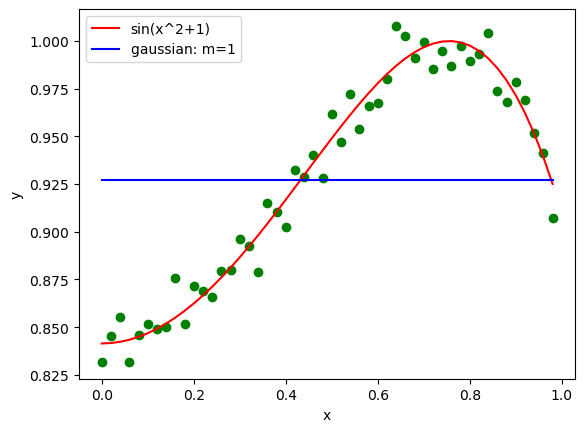

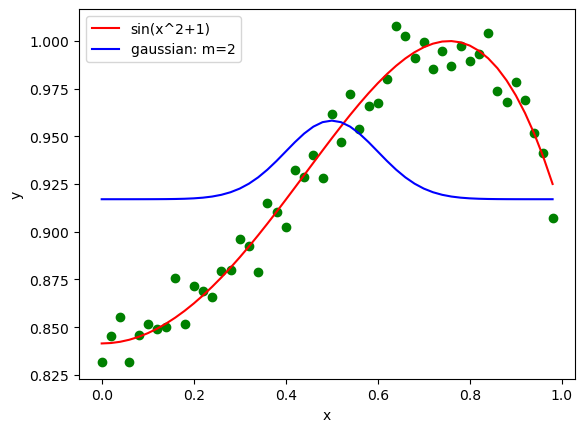

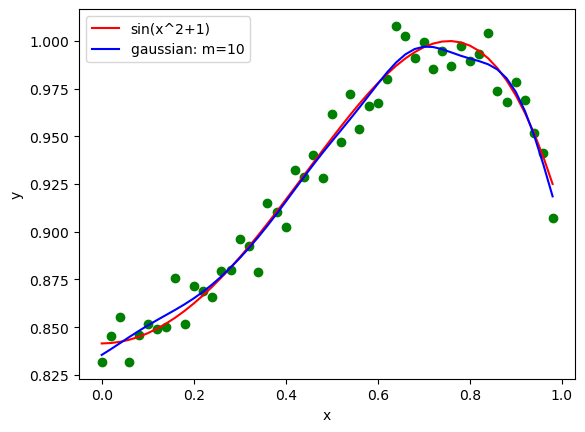

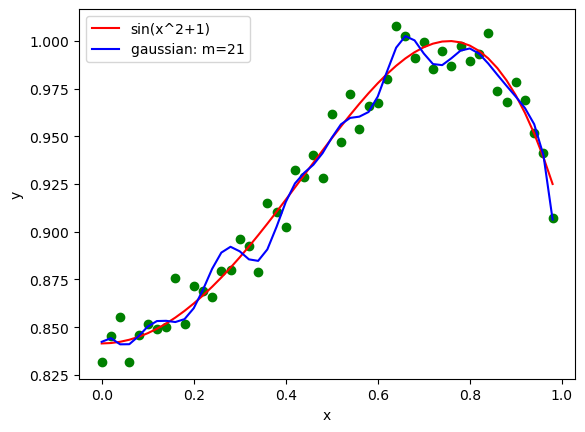

In [15]:
x, y_origin, y_noise = get_data(nodes, mu, var, 1.0, p_1)
params = [1, 2, 10, 21]
for m in params:
    w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
    y_ = X @ w_
    display(m, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')

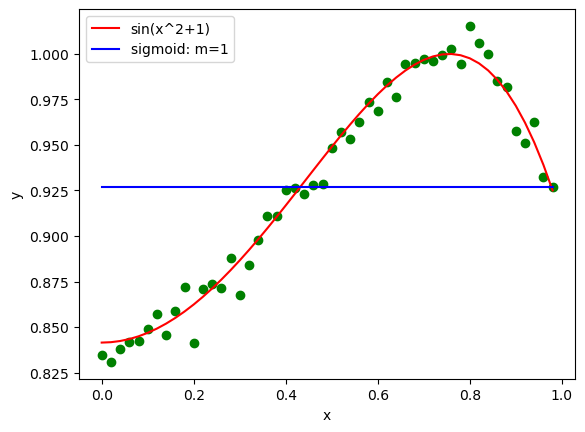

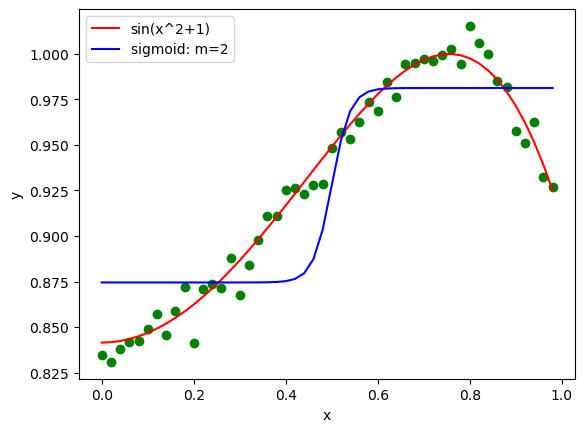

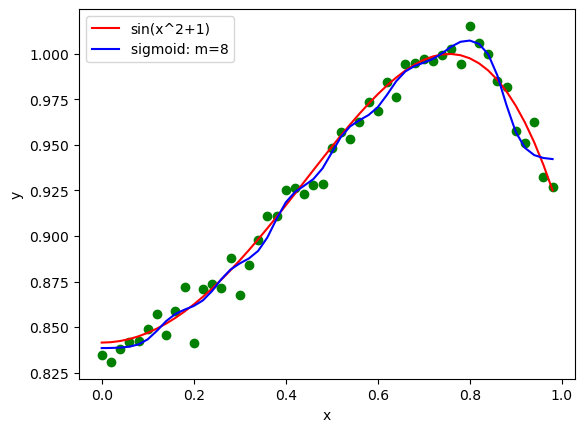

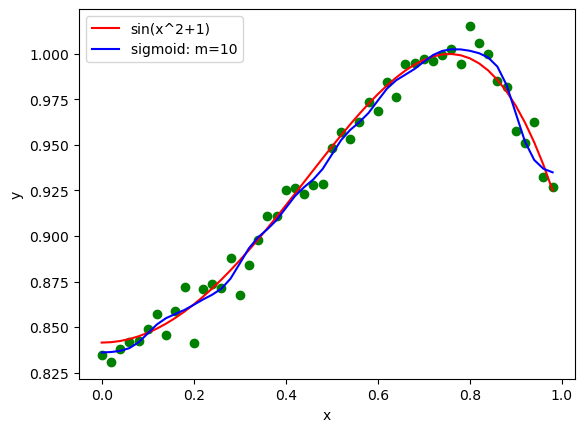

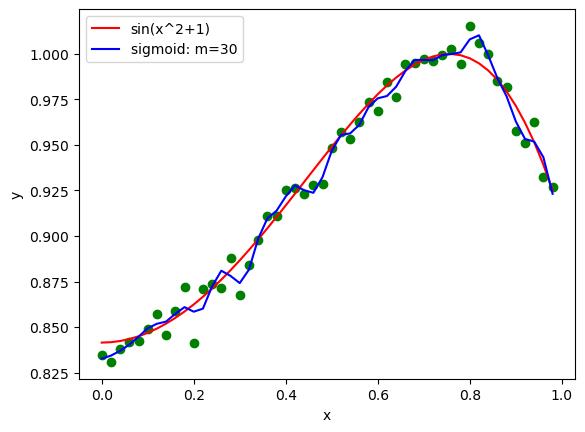

In [12]:
x, y_origin, y_noise = get_data(nodes, mu, var, 1.0, p_1)

params = [1, 2, 8, 10, 30]
for m in params:
    w_, X = mle_mine(m, x, y_noise, 4e-4, sigmoid, 1.0)
    y_ = X @ w_
    display(m, x, y_, y_origin, y_noise, 'sigmoid', 'sin(x^2+1)')

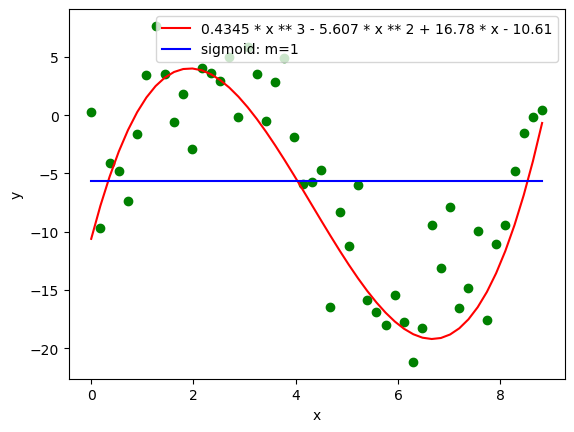

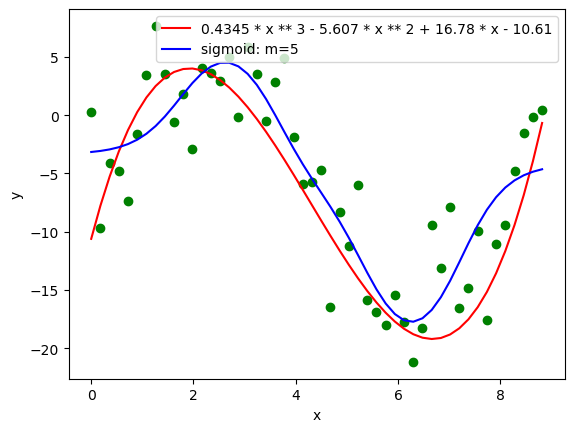

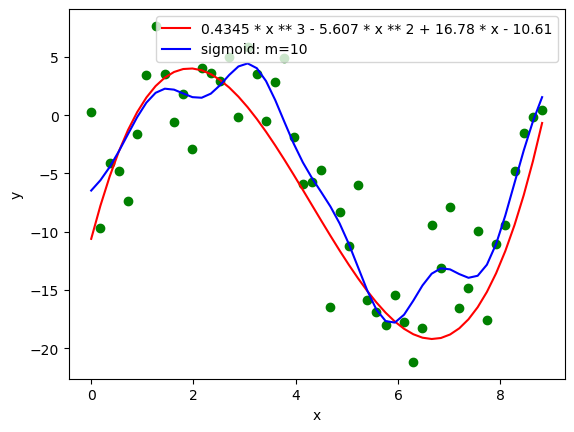

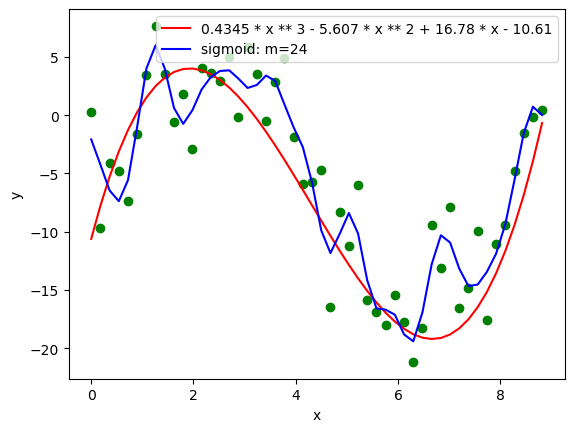

In [9]:
def p_2(x_):
    return 0.4345 * x_ ** 3 - 5.607 * x_ ** 2 + 16.78 * x_ - 10.61


x, y_origin, y_noise = get_data(nodes, mu, 4, 9, p_2)
params = [1, 5, 10, 24]
for m in params:
    w_, X = mle_mine(m, x, y_noise, 0.2, sigmoid, 9.0)
    y_ = X @ w_
    display(m, x, y_, y_origin, y_noise, 'sigmoid', '0.4345 * x ** 3 - 5.607 * x ** 2 + 16.78 * x - 10.61')

7.
Polynomials will put large data into very large data and small data into very small, which may cause problems when the computer is calculated, such as overflowing or disappearing. Also, the higher power may dominate the curve.
At the same time, each item of the polynomial will continue to accumulate errors, which may lead to insufficient robustness of the model.

Data may also be multidimensional, and the Gaussian function can easily process multidimensional data and convert it into one-dimensional data.

Nonlinear modeling: Gaussian functions and Sigmoid functions are nonlinear functions, which can better capture nonlinear relationships in data. These functions can adapt to the data distribution of various shapes, while polynomial functions are limited by the number of polynomials and may not fit complex data patterns well.

Smoothness: Gaussian functions and Sigmoid functions are usually smoother than polynomial functions, which is beneficial to the stability and generalization of the model. Smooth functions have continuous derivatives in the input space, which helps to avoid drastic fluctuations in the model between data points.